# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.309021e+01     1.448888e+01
 * time: 0.004091978073120117
     1     6.253879e+01     8.627458e+00
 * time: 0.011876106262207031
     2     5.735584e+01     1.049281e+01
 * time: 0.029788970947265625
     3     4.100647e+01     7.347442e+00
 * time: 0.05419206619262695
     4     3.129903e+01     7.001778e+00
 * time: 0.07724690437316895
     5     2.637132e+01     5.918526e+00
 * time: 0.09835600852966309
     6     1.237819e+01     2.632096e+00
 * time: 0.12235307693481445
     7     1.114846e+01     4.447899e+00
 * time: 0.13547897338867188
     8     9.557477e+00     2.820630e+00
 * time: 0.15205693244934082
     9     8.586061e+00     2.593103e+00
 * time: 0.224592924118042
    10     8.495489e+00     5.958341e+00
 * time: 0.23929095268249512
    11     7.989433e+00     2.670866e+00
 * time: 0.25386691093444824
    12     7.250677e+00     2.600715e+00
 * time: 0.26770591735839844
    13     7.038118e+00     2.909801e+00
 * time

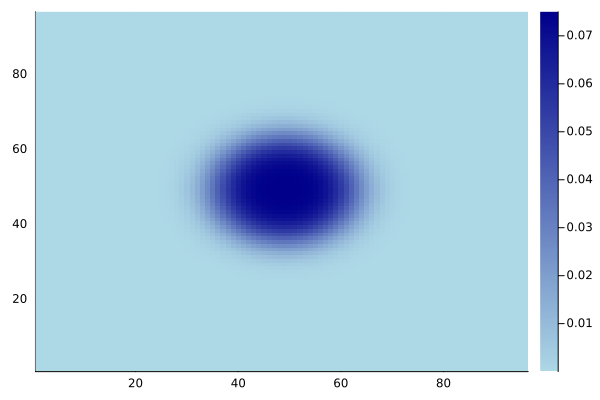

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)